In [1]:
## Part 1: Know Your Metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("OnlineRetail.csv",encoding="latin1")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [4]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [5]:
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

In [6]:
## 1- Monthly Revenue

data["Revenue"] = data["Quantity"] * data["UnitPrice"]
MonthlyRevenue = data.groupby(["InvoiceYearMonth"])["Revenue"].sum().reset_index()
MonthlyRevenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


Text(0.5, 1.0, 'MonthlyRevenue')

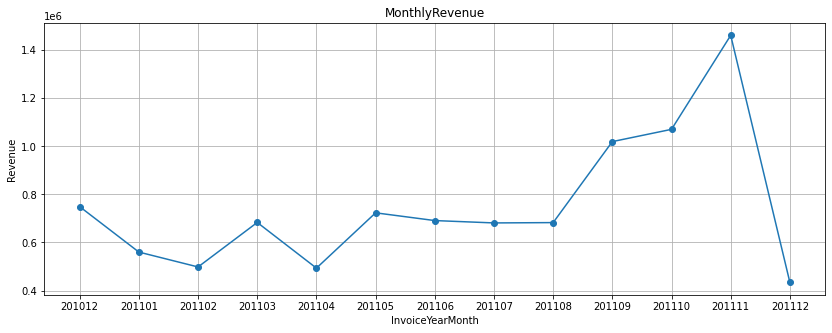

In [7]:
## 1- Monthly Revenue  Plot
plt.figure(figsize=(14,5))
plt.plot(MonthlyRevenue['InvoiceYearMonth'].to_numpy(np.str0),MonthlyRevenue["Revenue"],marker = "o")
plt.grid()
plt.xlabel("InvoiceYearMonth")
plt.ylabel("Revenue")
plt.title("MonthlyRevenue")

In [8]:
## 2- Monthly Revenue Growth Rate

MonthlyRevenue["RevenueGrowthRate"] = MonthlyRevenue["Revenue"].pct_change()

MonthlyRevenue = MonthlyRevenue.query("InvoiceYearMonth !=201112 and InvoiceYearMonth!=201112")

Text(0.5, 1.0, 'Monthly Revenue Growth Rate')

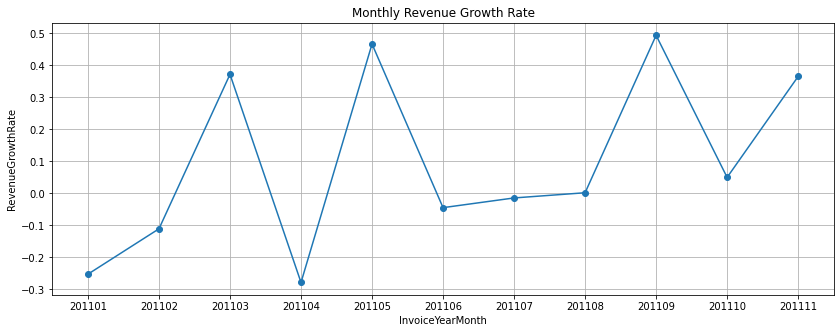

In [9]:
## 2- Monthly Revenue Growth Rate  Plot
plt.figure(figsize=(14,5))
plt.plot(MonthlyRevenue["InvoiceYearMonth"].to_numpy(np.str0),MonthlyRevenue["RevenueGrowthRate"],marker="o")
plt.grid()
plt.xlabel("InvoiceYearMonth")
plt.ylabel("RevenueGrowthRate")
plt.title("Monthly Revenue Growth Rate")

In [12]:
## Why did we lose in April?
## 1- Was it due to less active customers
## 2- our customers did less orders? 
## 3- Maybe they just started to buy cheaper products?

In [10]:
## 3- Monthly Active Customers

data_uk = data.query("Country=='United Kingdom'").reset_index(drop=True)
ActiveCustomers = data_uk.groupby("InvoiceYearMonth")["CustomerID"].nunique().reset_index()
ActiveCustomers

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


Text(0.5, 1.0, 'Monthly Active Customers')

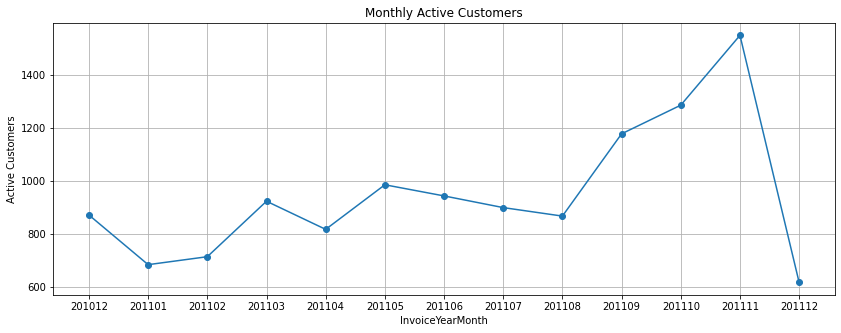

In [11]:
## 3- Monthly Active Customers  Plot
plt.figure(figsize=(14,5))
plt.plot(ActiveCustomers["InvoiceYearMonth"].to_numpy(np.str0),ActiveCustomers["CustomerID"],marker="o")
plt.grid()
plt.xlabel("InvoiceYearMonth")
plt.ylabel("Active Customers")
plt.title("Monthly Active Customers")

Text(0.5, 1.0, 'Monthly Active Customers')

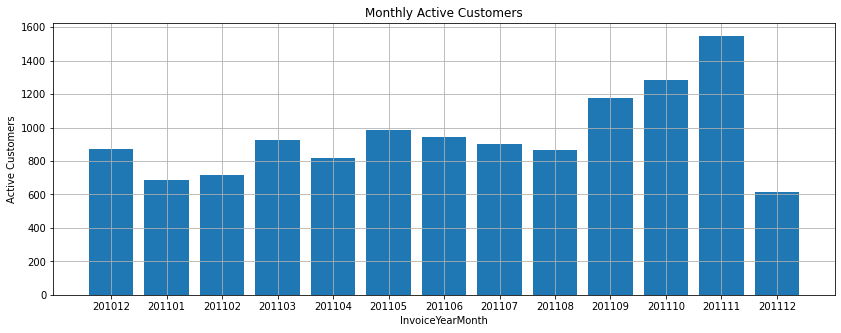

In [12]:
## 3- Monthly Active Customers  Bar
plt.figure(figsize=(14,5))
plt.bar(ActiveCustomers["InvoiceYearMonth"].to_numpy(np.str0),ActiveCustomers["CustomerID"])
plt.grid()
plt.xlabel("InvoiceYearMonth")
plt.ylabel("Active Customers")
plt.title("Monthly Active Customers")

In [13]:
## 4- Monthly Order Count

OrderCount = data_uk.groupby("InvoiceYearMonth")["Quantity"].sum().reset_index()
OrderCount

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


Text(0.5, 1.0, 'Monthly Order Count')

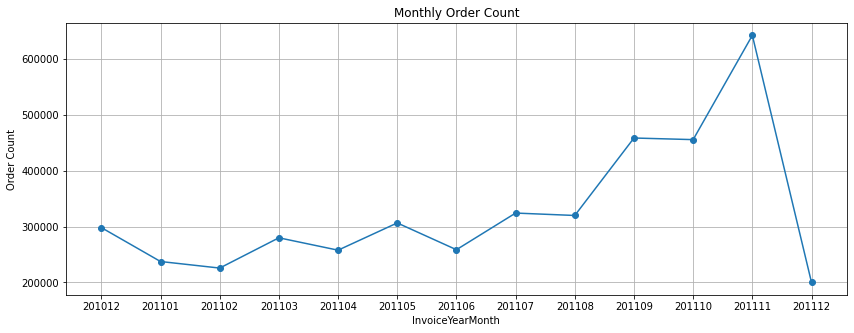

In [14]:
## 4- Monthly Order Count  plot 
plt.figure(figsize=(14,5))
plt.plot(OrderCount["InvoiceYearMonth"].to_numpy(np.str0),OrderCount["Quantity"],marker="o")
plt.grid()
plt.xlabel("InvoiceYearMonth")
plt.ylabel("Order Count")
plt.title("Monthly Order Count")

Text(0.5, 1.0, 'Monthly Order Count')

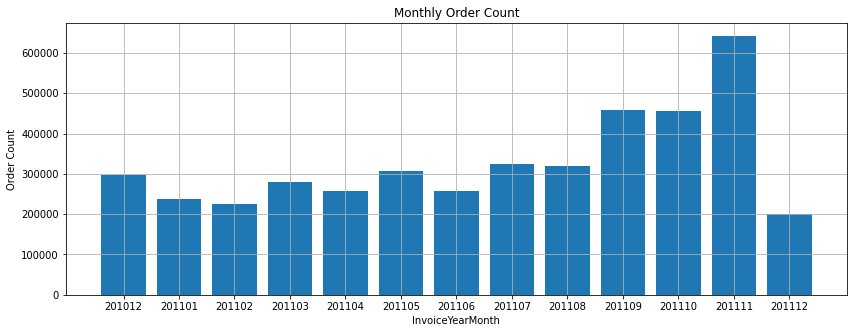

In [15]:
## 4- Monthly Order Count  bar
plt.figure(figsize=(14,5))
plt.bar(OrderCount["InvoiceYearMonth"].to_numpy(np.str0),OrderCount["Quantity"])
plt.grid()
plt.xlabel("InvoiceYearMonth")
plt.ylabel("Order Count")
plt.title("Monthly Order Count")

In [16]:
## 5- Average Revenue per Order
AverageRevenue = data_uk.groupby("InvoiceYearMonth")["Revenue"].mean().reset_index()
AverageRevenue

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


Text(0.5, 1.0, 'Average Revenue per Order')

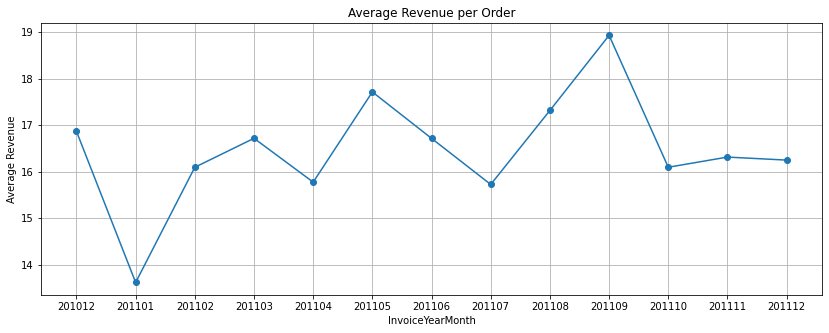

In [17]:
## 5- Average Revenue per Order  plot

plt.figure(figsize=(14,5))
plt.plot(AverageRevenue["InvoiceYearMonth"].to_numpy(np.str0),AverageRevenue["Revenue"],marker="o")
plt.grid()
plt.xlabel("InvoiceYearMonth")
plt.ylabel("Average Revenue")
plt.title("Average Revenue per Order")

Text(0.5, 1.0, 'Average Revenue per Order')

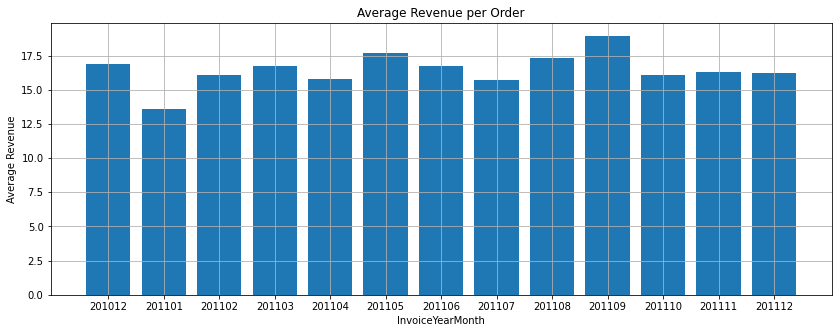

In [18]:
## 5- Average Revenue per Order  bar

plt.figure(figsize=(14,5))
plt.bar(AverageRevenue["InvoiceYearMonth"].to_numpy(np.str0),AverageRevenue["Revenue"])
plt.grid()
plt.xlabel("InvoiceYearMonth")
plt.ylabel("Average Revenue")
plt.title("Average Revenue per Order")

In [19]:
## 6- New Customer Ratio

FirstOrder = data_uk.groupby("CustomerID").InvoiceDate.min().reset_index()
FirstOrder.columns = ['CustomerID','FirstOrderDate']
FirstOrder['FirstYearMonth'] = FirstOrder['FirstOrderDate'].map(lambda date: 100*date.year + date.month)
data_uk = pd.merge(data_uk, FirstOrder, on='CustomerID')
data_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,FirstOrderDate,FirstYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012


In [20]:
## 6- New Customer Ratio

data_uk["UserType"]="New"
data_uk.loc[data_uk['InvoiceYearMonth']> data_uk['FirstYearMonth'],'UserType'] = 'Existing'
NewCustomerRatio = data_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()
NewCustomerRatio = NewCustomerRatio.query("InvoiceYearMonth!=201112 and Revenue !=201112")

Text(0.5, 1.0, 'New Customer Ratio')

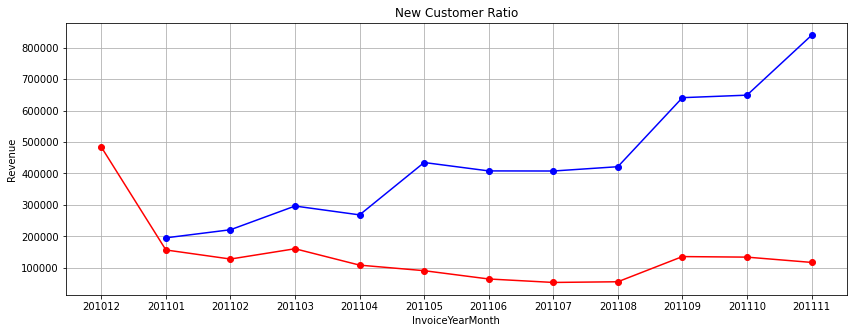

In [21]:
## 6- New Customer Ratio   plot

plt.figure(figsize=(14,5))
plt.plot(NewCustomerRatio.query('UserType=="New"')["InvoiceYearMonth"].to_numpy(np.str0),NewCustomerRatio.query('UserType=="New"')["Revenue"],c="red",marker="o")
plt.plot(NewCustomerRatio.query('UserType=="Existing"')["InvoiceYearMonth"].to_numpy(np.str0),NewCustomerRatio.query('UserType=="Existing"')["Revenue"],c="blue",marker="o")
plt.grid()
plt.xlabel("InvoiceYearMonth")
plt.ylabel("Revenue")
plt.title("New Customer Ratio")

In [22]:
## 7-  New to current customer ratio

Newtocurrentcustomers = (data_uk.query('UserType=="New"').groupby("InvoiceYearMonth")["CustomerID"].nunique()/data_uk.query('UserType=="Existing"').groupby("InvoiceYearMonth")["CustomerID"].nunique()).reset_index()
Newtocurrentcustomers

,InvoiceYearMonth,CustomerID
0,201012,NaN
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878


Text(0.5, 1.0, 'New to current customer ratio')

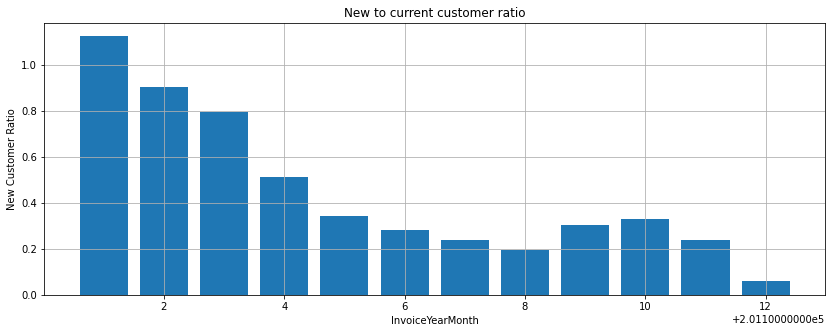

In [23]:
## 7-  New to current customer ratio  bar

plt.figure(figsize=(14,5))
plt.bar(Newtocurrentcustomers["InvoiceYearMonth"],Newtocurrentcustomers["CustomerID"])
plt.grid()
plt.xlabel("InvoiceYearMonth")
plt.ylabel("New Customer Ratio")
plt.title("New to current customer ratio")

In [24]:
## 8- Monthly Retention Rate

ActiveCustom = data_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
RetentionCustomers = pd.crosstab(ActiveCustom['CustomerID'], ActiveCustom['InvoiceYearMonth']).reset_index()
RetentionCustomers.head()



InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [25]:
months = RetentionCustomers.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = RetentionCustomers[selected_month].sum()
    retention_data['RetainedUserCount'] = RetentionCustomers[(RetentionCustomers[selected_month]>0) & (RetentionCustomers[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

RetentionCustomers = pd.DataFrame(retention_array)
RetentionCustomers['RetentionRate'] = RetentionCustomers['RetainedUserCount']/RetentionCustomers['TotalUserCount']


In [26]:
RetentionCustomers = RetentionCustomers.query("InvoiceYearMonth!=201112 and InvoiceYearMonth!=201112")
RetentionCustomers

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


Text(0.5, 1.0, 'Monthly Retention Rate')

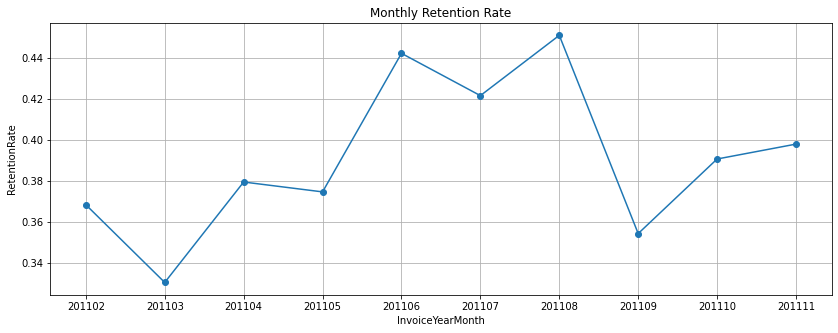

In [27]:
## 8- Monthly Retention Rate  plot

plt.figure(figsize=(14,5))
plt.plot(RetentionCustomers["InvoiceYearMonth"].to_numpy(np.str0),RetentionCustomers["RetentionRate"],marker="o")
plt.grid()
plt.xlabel("InvoiceYearMonth")
plt.ylabel("RetentionRate")
plt.title("Monthly Retention Rate")

Text(0.5, 1.0, 'Monthly Retention Rate')

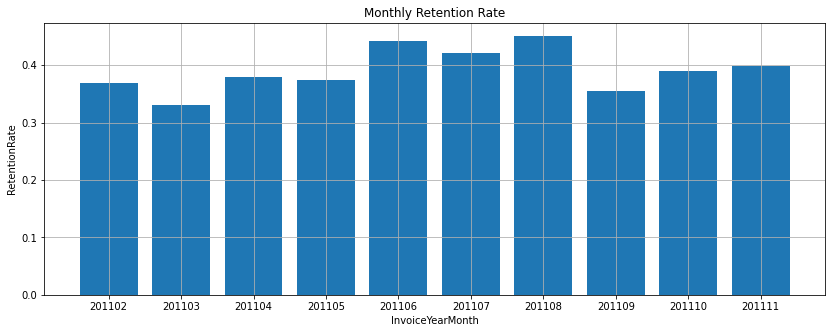

In [28]:
## 8- Monthly Retention Rate  bar

plt.figure(figsize=(14,5))
plt.bar(RetentionCustomers["InvoiceYearMonth"].to_numpy(np.str0),RetentionCustomers["RetentionRate"])
plt.grid()
plt.xlabel("InvoiceYearMonth")
plt.ylabel("RetentionRate")
plt.title("Monthly Retention Rate")

In [29]:
## 9- Cohort Based Retention Rate

RetentionCustomers = pd.crosstab(ActiveCustom['CustomerID'], ActiveCustom['InvoiceYearMonth']).reset_index()
RetentionCustomers = pd.merge(RetentionCustomers,FirstOrder[['CustomerID','FirstOrderDate']],on='CustomerID')
new_column_names = [ 'm_' + str(column) for column in RetentionCustomers.columns[:-1]]
new_column_names.append('FirstOrderDate')
RetentionCustomers.columns = new_column_names

In [30]:
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan

In [31]:
 total_user_count = RetentionCustomers[RetentionCustomers.FirstOrderDate ==  selected_month].FirstOrderDate.count()
retention_data['TotalUserCount'] = total_user_count
retention_data[selected_month] = 1 
    
query = "FirstOrderDate == {}".format(selected_month)

In [32]:
for next_month in next_months:
    new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
    retention_data[next_month] = np.round(RetentionCustomers.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)

In [33]:
RetentionCustomers = pd.DataFrame(retention_array)
RetentionCustomers.index = months